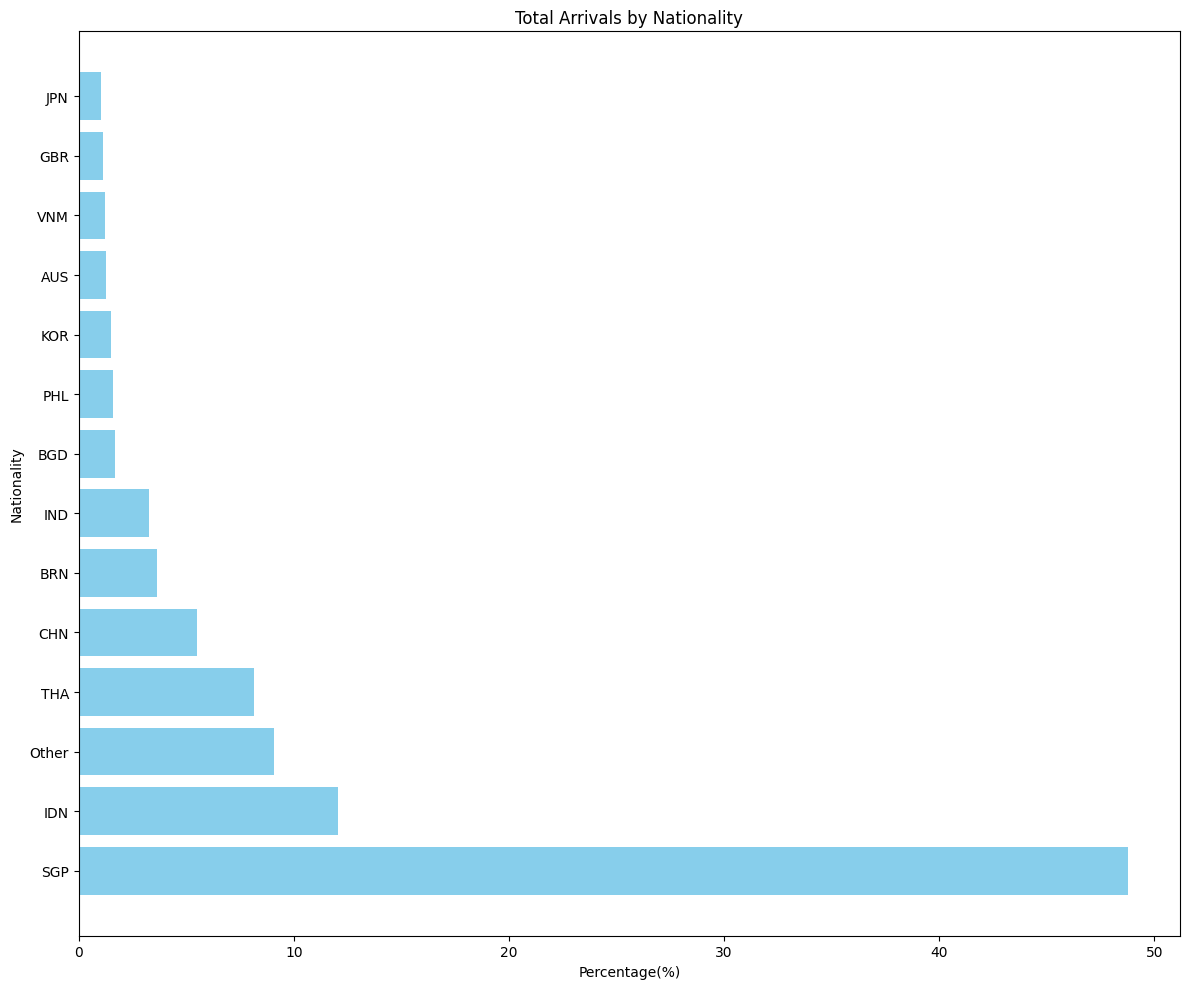

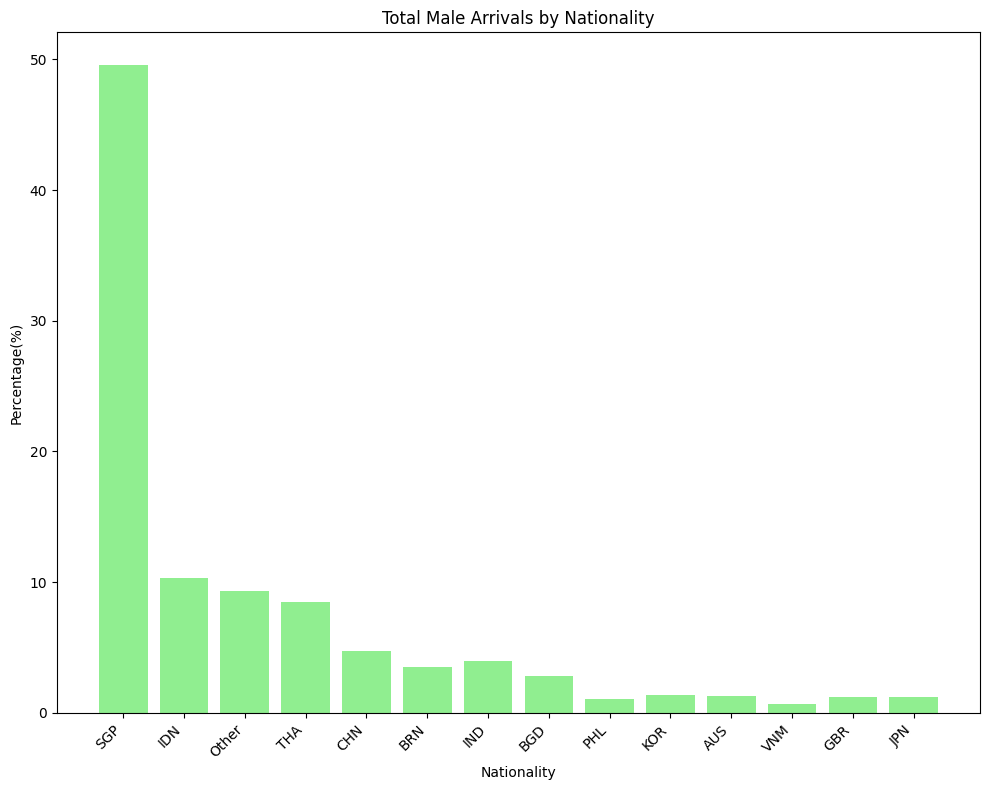

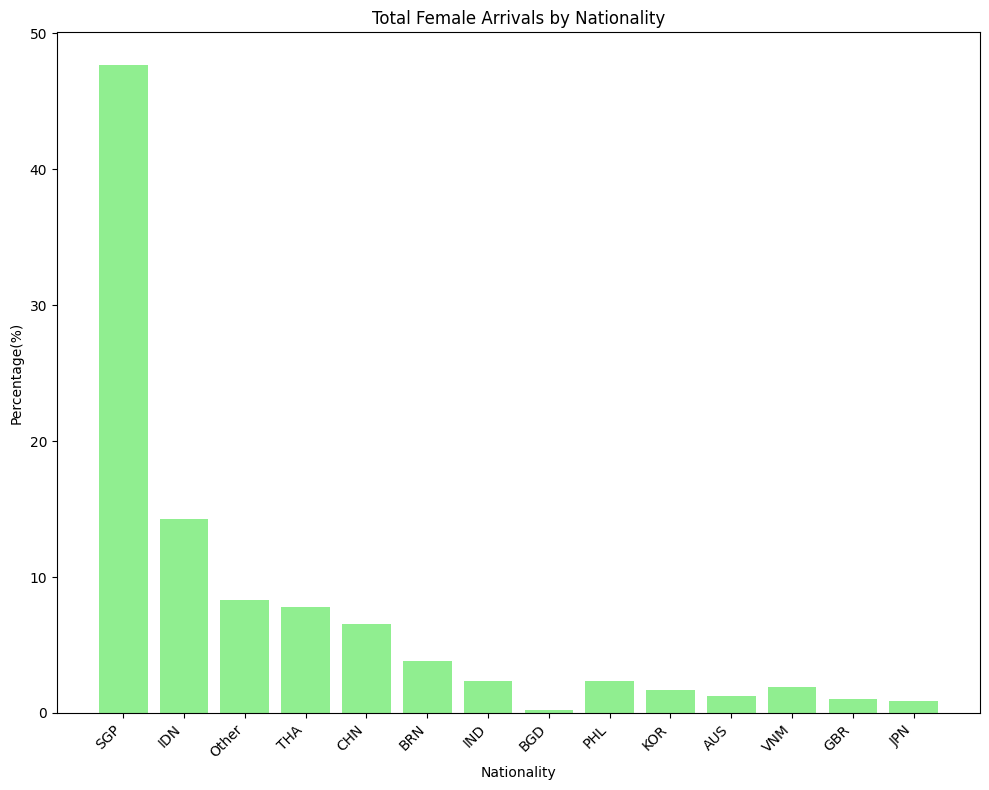

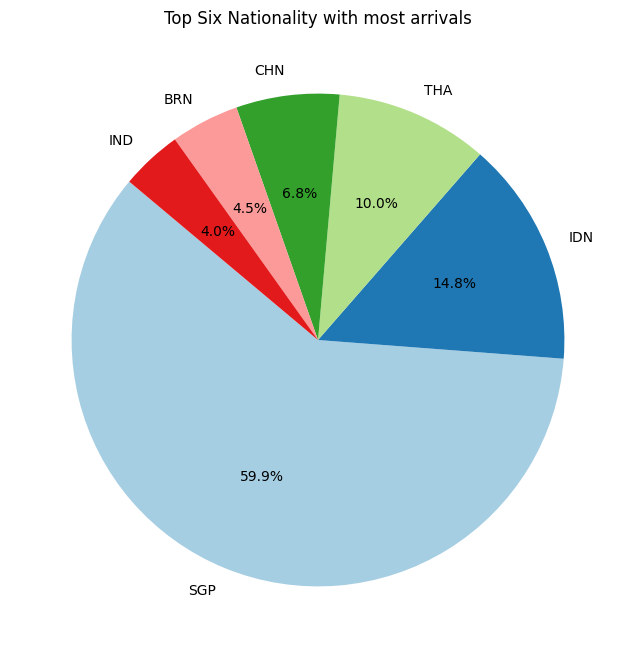

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)

        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")

def clean_data(df):
    try:
        df = df[df['arrivals'] != 0]
        df = df.dropna()
        df = df.drop_duplicates()
        df = df.reset_index(drop=True)

        return df

    except Exception as e:
        print(f"An error occurred during data cleaning: {e}")
        return None

def total_arrivals_by_country(df):
    try:
        grouped_df = df.groupby('country')[['arrivals', 'arrivals_male', 'arrivals_female']].sum().reset_index()

        total_arrivals = grouped_df['arrivals'].sum()
        total_male_arrivals = grouped_df['arrivals_male'].sum()
        total_female_arrivals = grouped_df['arrivals_female'].sum()

        # Calculate percentage of total arrivals for each country
        grouped_df['percentage'] = (grouped_df['arrivals'] / total_arrivals) * 100
        grouped_df['male_percentage'] = (grouped_df['arrivals_male'] / total_male_arrivals) * 100
        grouped_df['female_percentage'] = (grouped_df['arrivals_female'] / total_female_arrivals) * 100

        # Separate out countries with less than 1% arrivals
        small_countries_total = grouped_df[grouped_df['percentage'] < 1]
        large_countries_total = grouped_df[grouped_df['percentage'] >= 1]

        small_countries_male = grouped_df[grouped_df['male_percentage'] < 1]
        small_countries_female = grouped_df[grouped_df['female_percentage'] < 1]

        # Sum the arrivals and percentage for small countries and group them under 'Other'
        if not small_countries_total.empty:
            other_row = pd.DataFrame({
                'country': ['Other'],
                'arrivals': [small_countries_total['arrivals'].sum()],
                'arrivals_male': [small_countries_total['arrivals_male'].sum()],
                'arrivals_female': [small_countries_total['arrivals_female'].sum()],
                'percentage': [small_countries_total['percentage'].sum()],
                'male_percentage': [small_countries_male['male_percentage'].sum()],
                'female_percentage': [small_countries_female['female_percentage'].sum()]
            })
            grouped_df = pd.concat([large_countries_total, other_row], ignore_index=True)

        # Sort by percentage in descending order
        grouped_df = grouped_df.sort_values(by='percentage', ascending=False).reset_index(drop=True)

        return grouped_df

    except KeyError:
        print(f"Error: Column not found in DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred during analysis: {e}")
        return None

def plot_barhchart(df,title , y_axis):
    try:
        plt.figure(figsize=(12, 10))
        plt.barh(df['country'], df[y_axis], color='skyblue')
        plt.title(title)
        plt.xlabel('Percentage(%)')
        plt.ylabel('Nationality')
        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: 'country' or 'arrivals' column not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def plot_barchart(df,title , y_axis):
    try:
        plt.figure(figsize=(10, 8))
        plt.bar(df['country'], df[y_axis], color='lightgreen')
        plt.title(title)
        plt.xlabel('Nationality')
        plt.ylabel('Percentage(%)')
        plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: 'country' or 'arrivals' column not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def plot_piechart(df,title):
    try:
        df_filtered = df[df['country'].str.lower() != 'other']

        six_most_people = df_filtered.nlargest(6, 'arrivals')

        plt.figure(figsize=(10, 8))
        plt.pie(six_most_people['arrivals'], labels=six_most_people['country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title(title)
        plt.show()
    except KeyError:
        print(f"Error: 'country' or 'arrivals' column not found in DataFrame.")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def main():
    file_path = 'arrivals_soe.csv'
    df = load_data(file_path)

    if df is not None:
        df = clean_data(df)

        if df is not None:
            df = total_arrivals_by_country(df)
            df.to_csv('total_arrivals.csv', index=False)

            plot_barhchart(df , 'Total Arrivals by Nationality' , 'percentage')
            plot_barchart(df , 'Total Male Arrivals by Nationality' , 'male_percentage')
            plot_barchart(df , 'Total Female Arrivals by Nationality' , 'female_percentage')
            plot_piechart(df , 'Top Six Nationality with most arrivals' )


if __name__ == "__main__":
    main()